# A case study based on sales data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pt
import seaborn as sns
from scipy.stats import f_oneway,kstest,kruskal,yeojohnson
import scipy.stats as stats
%matplotlib inline

In [2]:
# importing data

data = pd.read_csv('./Stores.csv')
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


Store ID:      (Index) ID du magasin concerné.

Store_Area:     Superficie du magasin en mètres carrés.

Items_Available: Nombre d'articles disponibles dans le magasin correspondant.

DailyCustomerCount: Nombre moyen de clients ayant visité les magasins sur une période mensuelle.

Store_Sales:  Ventes en dollars $  américains réalisées par les magasins.

In [3]:
data.shape

(896, 5)

## Cleaning Data

In [4]:
#-- Checking format
data.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [5]:
#-- Checking for null values
data.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [6]:
#-- Checking for duplicates data

data.duplicated().sum()

0

In [7]:
#-------------------  reorganizing the data

# rename some features

data = data.rename(columns={'Store_Area':'Store_size'})

#remove store_ID --> not necessary for our analysis 
data = data.drop('Store ID ',axis=1)

data.head()

,Store_size,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


## Exploring Data

## Exploring Data

In [8]:
# -- data description

data.describe()

,Store_size,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


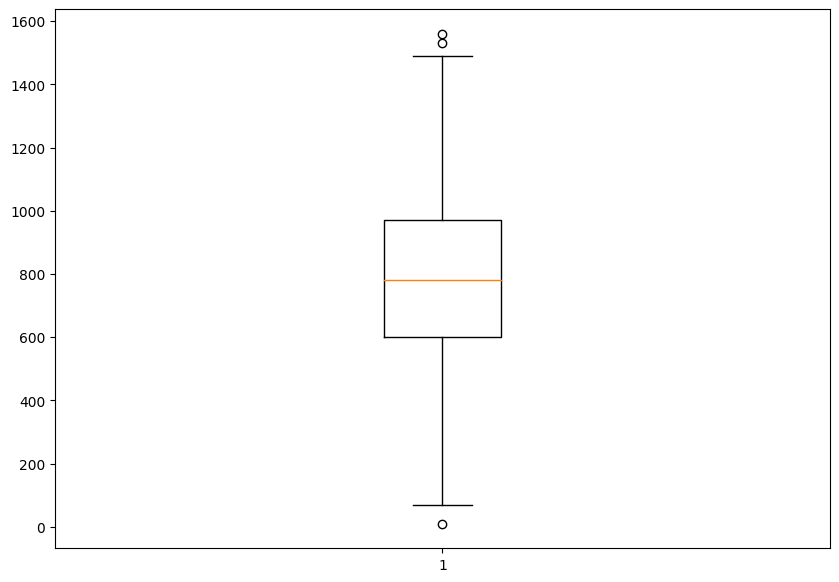

In [9]:
#checking for outliers

fig = plt.figure(figsize =(10, 7))

plt.boxplot(data['Daily_Customer_Count'])
plt.show()

The data doesn't seem to have outliers. Except for the Store ID = 39 whose Daily_customer_count = 10 which very far from others.

In [10]:
#search line by index
#data.iloc[39]

#Delete outlier : drop line by index

data = data.drop([39], axis=0) 
data.shape

(895, 4)

## checking for correlation

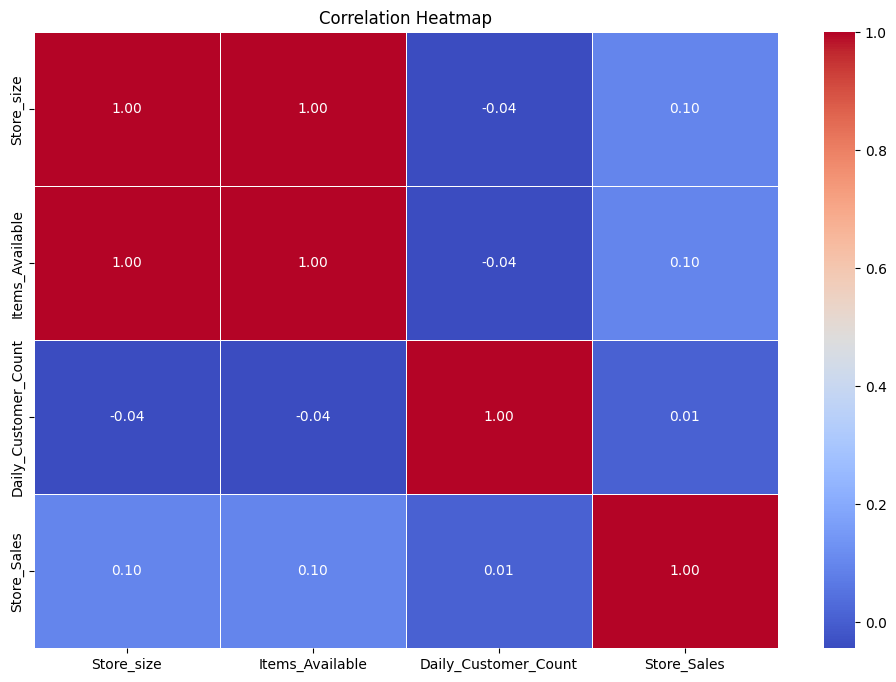

In [12]:
correlation_matrix =data [['Store_size','Items_Available','Daily_Customer_Count','Store_Sales']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We can see that there is a perfect correlation between "Store Size & Item Available".

## Analysing Data

Let's check the relationships more deeply.

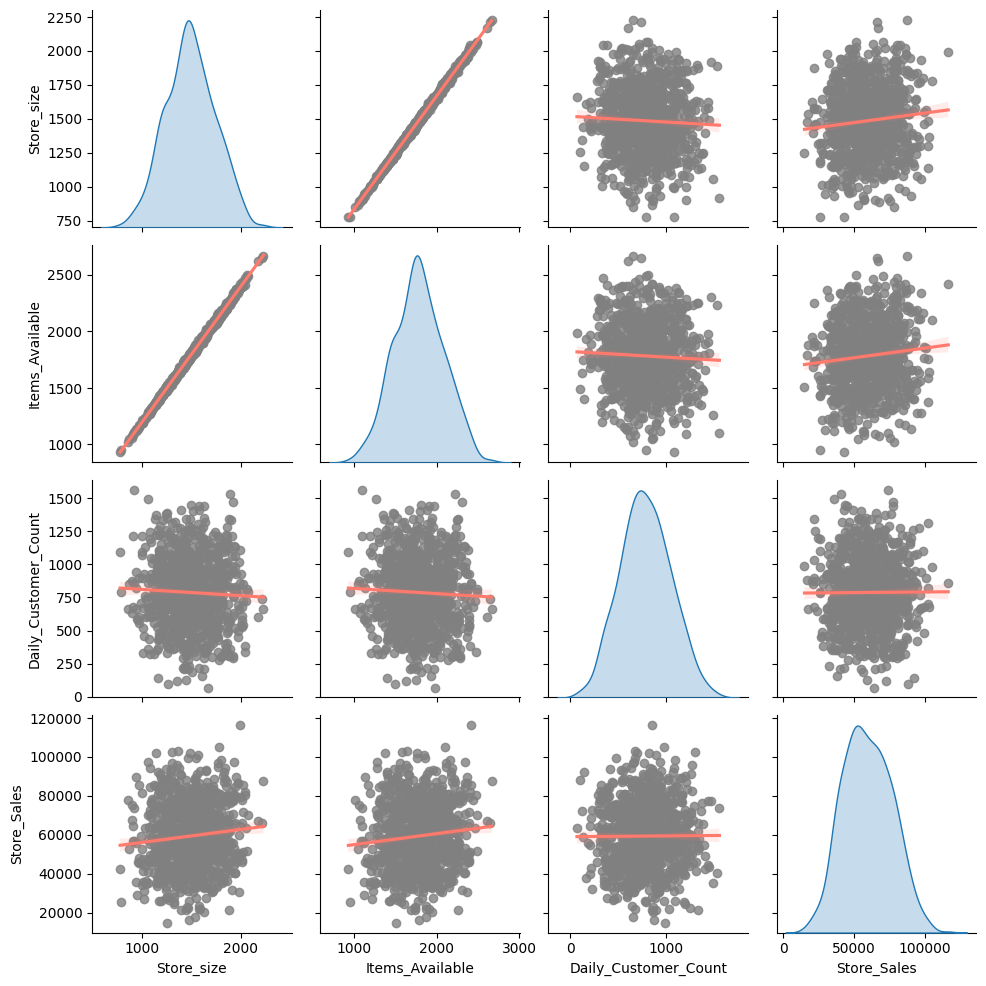

In [13]:
sns.pairplot(data ,
            diag_kind='kde',kind='reg',
            plot_kws={'color':'xkcd:salmon',
                      'scatter_kws':{'color':'gray'}
                      }
            );

The result we have from the pairplot confirms the hypothesis of the heat map.


We can see from the scatter plot that there is no linear relationship between store_sales and daily customers visit counts,  there is a huge variation and no specific pattern in the data. We can relate this to customer purchasing behavior and possibly the type of products the store sells.

### Distribution of the samples

In [14]:
#checking the distribution for each feature with  KS-test

for column in data.columns:
  print(column)
  statistic, p_value = kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
  print(f'the distribution of the {column} feature')
  print('the Statistc value : ',statistic)
  print('the p-value : ',p_value)
  print(' ')

Store_size
the distribution of the Store_size feature
the Statistc value :  0.025857317037275063
the p-value :  0.578559421619663
 
Items_Available
the distribution of the Items_Available feature
the Statistc value :  0.023183918132320624
the p-value :  0.7127980646140306
 
Daily_Customer_Count
the distribution of the Daily_Customer_Count feature
the Statistc value :  0.023728935419216945
the p-value :  0.6855205012587648
 
Store_Sales
the distribution of the Store_Sales feature
the Statistc value :  0.03847418002315223
the p-value :  0.13769444019800448
 


All features seem to follow a normal distribution " P-value > alpha = 0.05 "


## Impact of store size

We want to assess the impact of store size on the number of daily customers and total sales.

We first need to break down the data by store size in order to better organize it and examine the variation.

In [16]:
# the ranges of choosed 

bins = [750,1316,1750,2250]

labels = ['750-1250', '1250-1750', '1750-2250']


In [17]:
# Create a new column 'Store_size_range' with the binned data
data['Store_size_range'] = pd.cut(data['Store_size'], bins=bins, labels=labels)
sizeData = data.groupby('Store_size_range').size()
sizeData.head()

Store_size_range
750-1250     223
1250-1750    526
1750-2250    146
dtype: int64

In [18]:
# the percentage of each Store_size_range

countPercentage = ((sizeData/len(data))*100).round()
countPercentage

Store_size_range
750-1250     25.0
1250-1750    59.0
1750-2250    16.0
dtype: float64

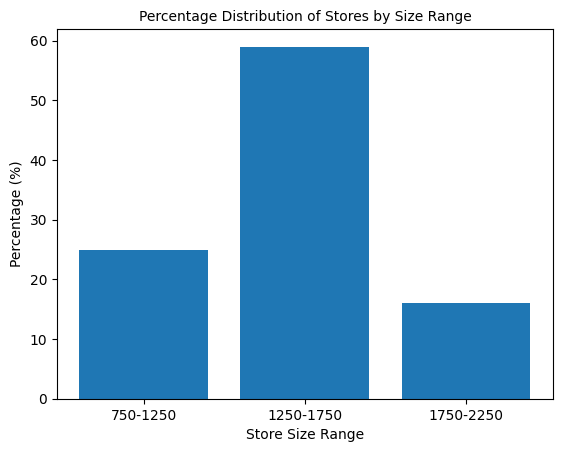

In [28]:
#plotting the results


plt.title('Percentage Distribution of Stores by Size Range',fontsize = 10)

plt.bar(height = countPercentage.values, x =sizeData.index) # Use values for percentages
plt.xlabel('Store Size Range')
plt.ylabel('Percentage (%)')
plt.show()

In [35]:
#Create new data set: grouping by Store_size_range
newData = data.groupby('Store_size_range')

In [38]:
# create anew colonne "Size_class"

array_class=[]

def class_size(x):

    if(750 <= x['Store_size'] and x['Store_size'] < 1250): 
        array_class.append("small")
    if(1250 <= x['Store_size'] and x['Store_size'] < 1750):
        array_class.append("medium")
    if(1750 <= x['Store_size'] and x['Store_size'] <= 2250):
         array_class.append("big")
    return array_class


data.apply(class_size, axis=1)
data['class_size']=array_class
data

,Store_size,Items_Available,Daily_Customer_Count,Store_Sales,Store_size_range,class_size
0,1659,1961,530,66490,1250-1750,medium
1,1461,1752,210,39820,1250-1750,medium
2,1340,1609,720,54010,1250-1750,medium
3,1451,1748,620,53730,1250-1750,medium
4,1770,2111,450,46620,1750-2250,big
...,...,...,...,...,...,...
891,1582,1910,1080,66390,1250-1750,medium
892,1387,1663,850,82080,1250-1750,medium
893,1200,1436,1060,76440,750-1250,small
894,1299,1560,770,96610,750-1250,medium


### Compare store size (range) with Daily Customers

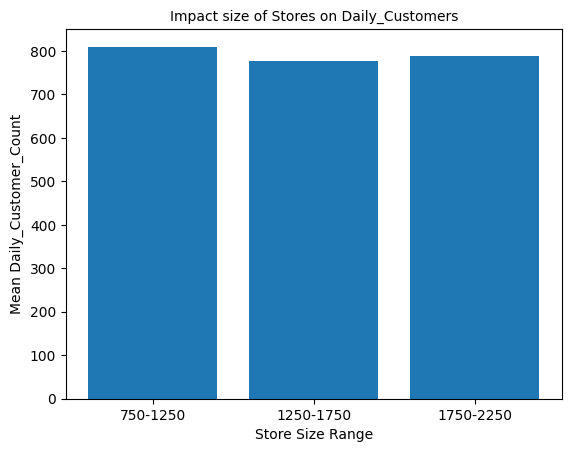

In [36]:
Daily_Customers=newData['Daily_Customer_Count'].mean()

#plotting the results

plt.title('Impact size of Stores on Daily_Customers',fontsize = 10)
plt.bar(height = Daily_Customers, x =sizeData.index) # Use values for percentages
plt.xlabel('Store Size Range')
plt.ylabel('Mean Daily_Customer_Count')
plt.show()

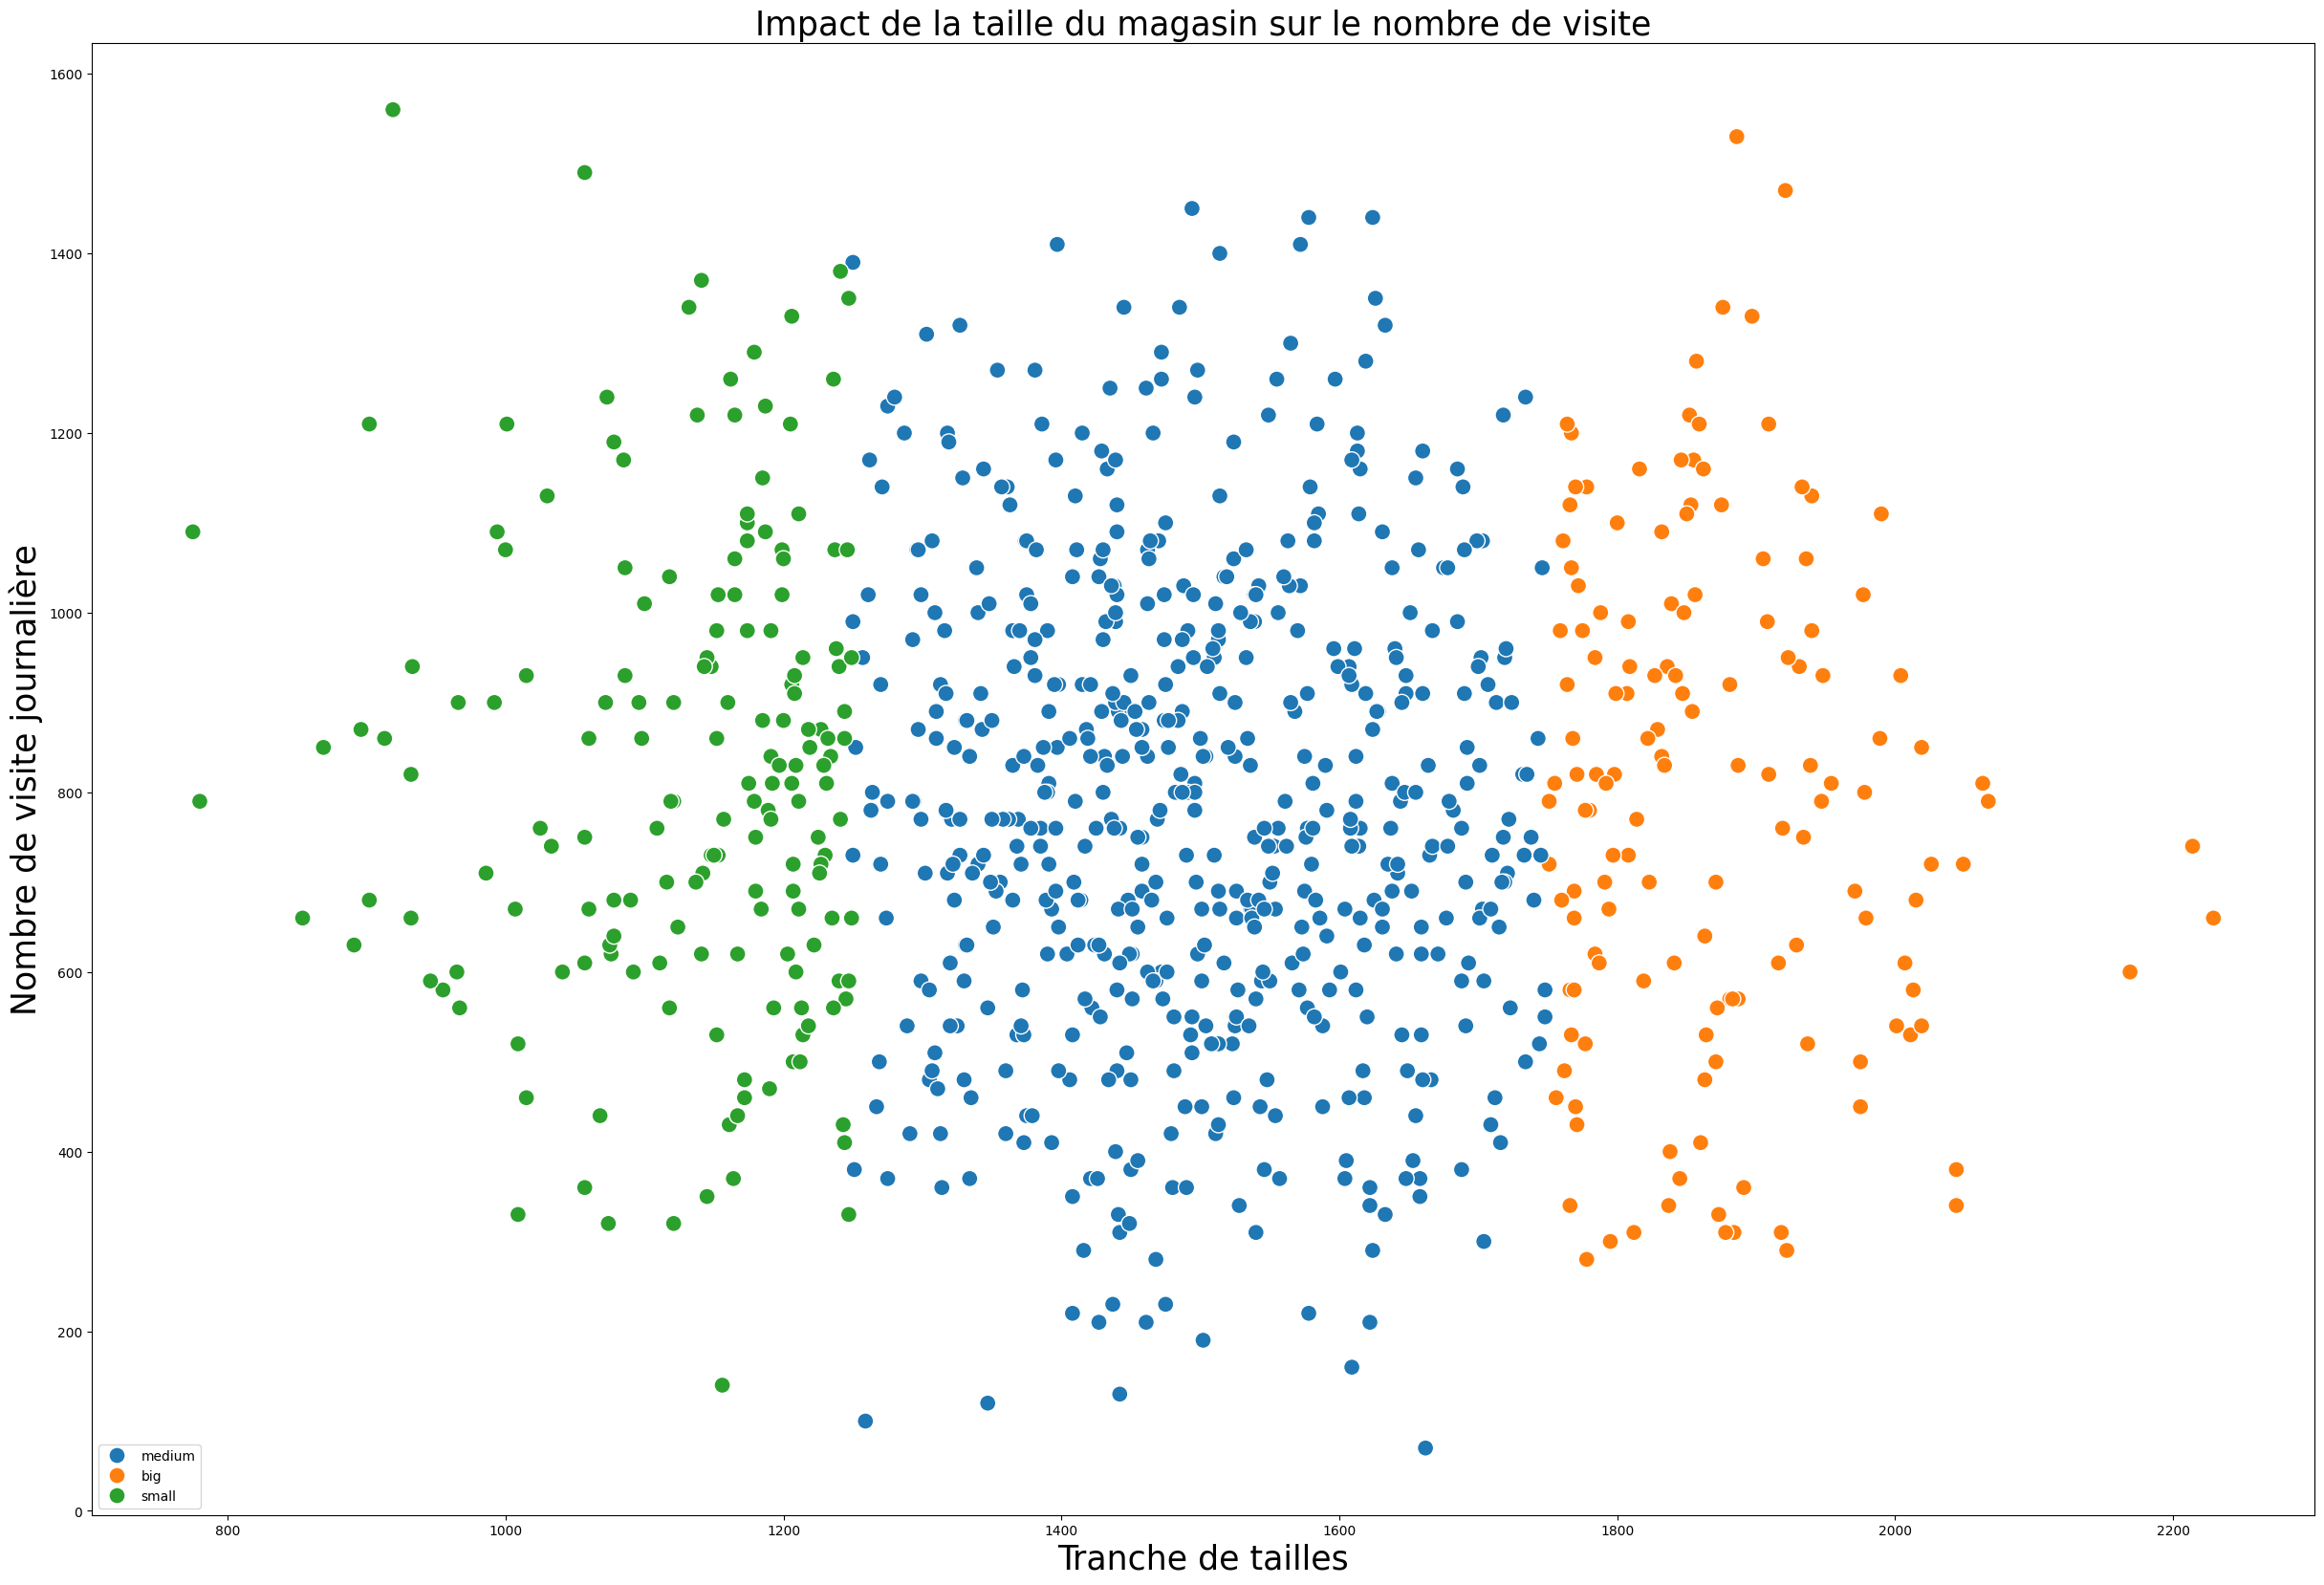

In [40]:
#Show result by class size

plt.figure(figsize = (30,20))

sns.scatterplot(data=data,x='Store_size', y= "Daily_Customer_Count", hue="class_size", s=150)

plt.legend(loc='lower left',markerscale=1)

plt.xlabel('Tranche de tailles',size=25)
plt.ylabel('Nombre de visite journalière',size=25)
plt.title('Impact de la taille du magasin sur le nombre de visite', size=25)
plt.show()

### Compare store size (range) with the available items

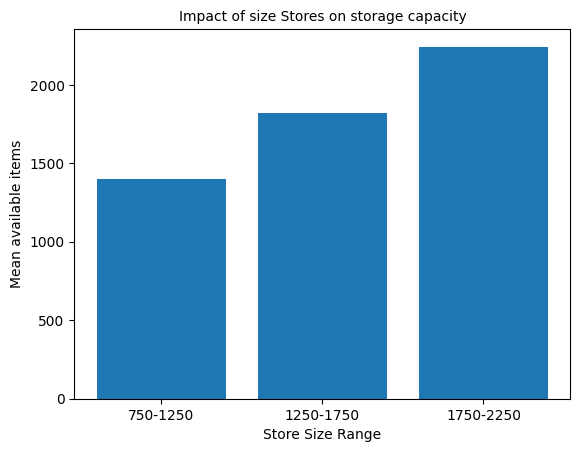

In [33]:

Items_Available=newData['Items_Available'].mean()

#plotting the results

plt.title('Impact of size Stores on storage capacity',fontsize = 10)
plt.bar(height = Items_Available, x =sizeData.index) # Use values for percentages
plt.xlabel('Store Size Range')
plt.ylabel('Mean available items')
plt.show()

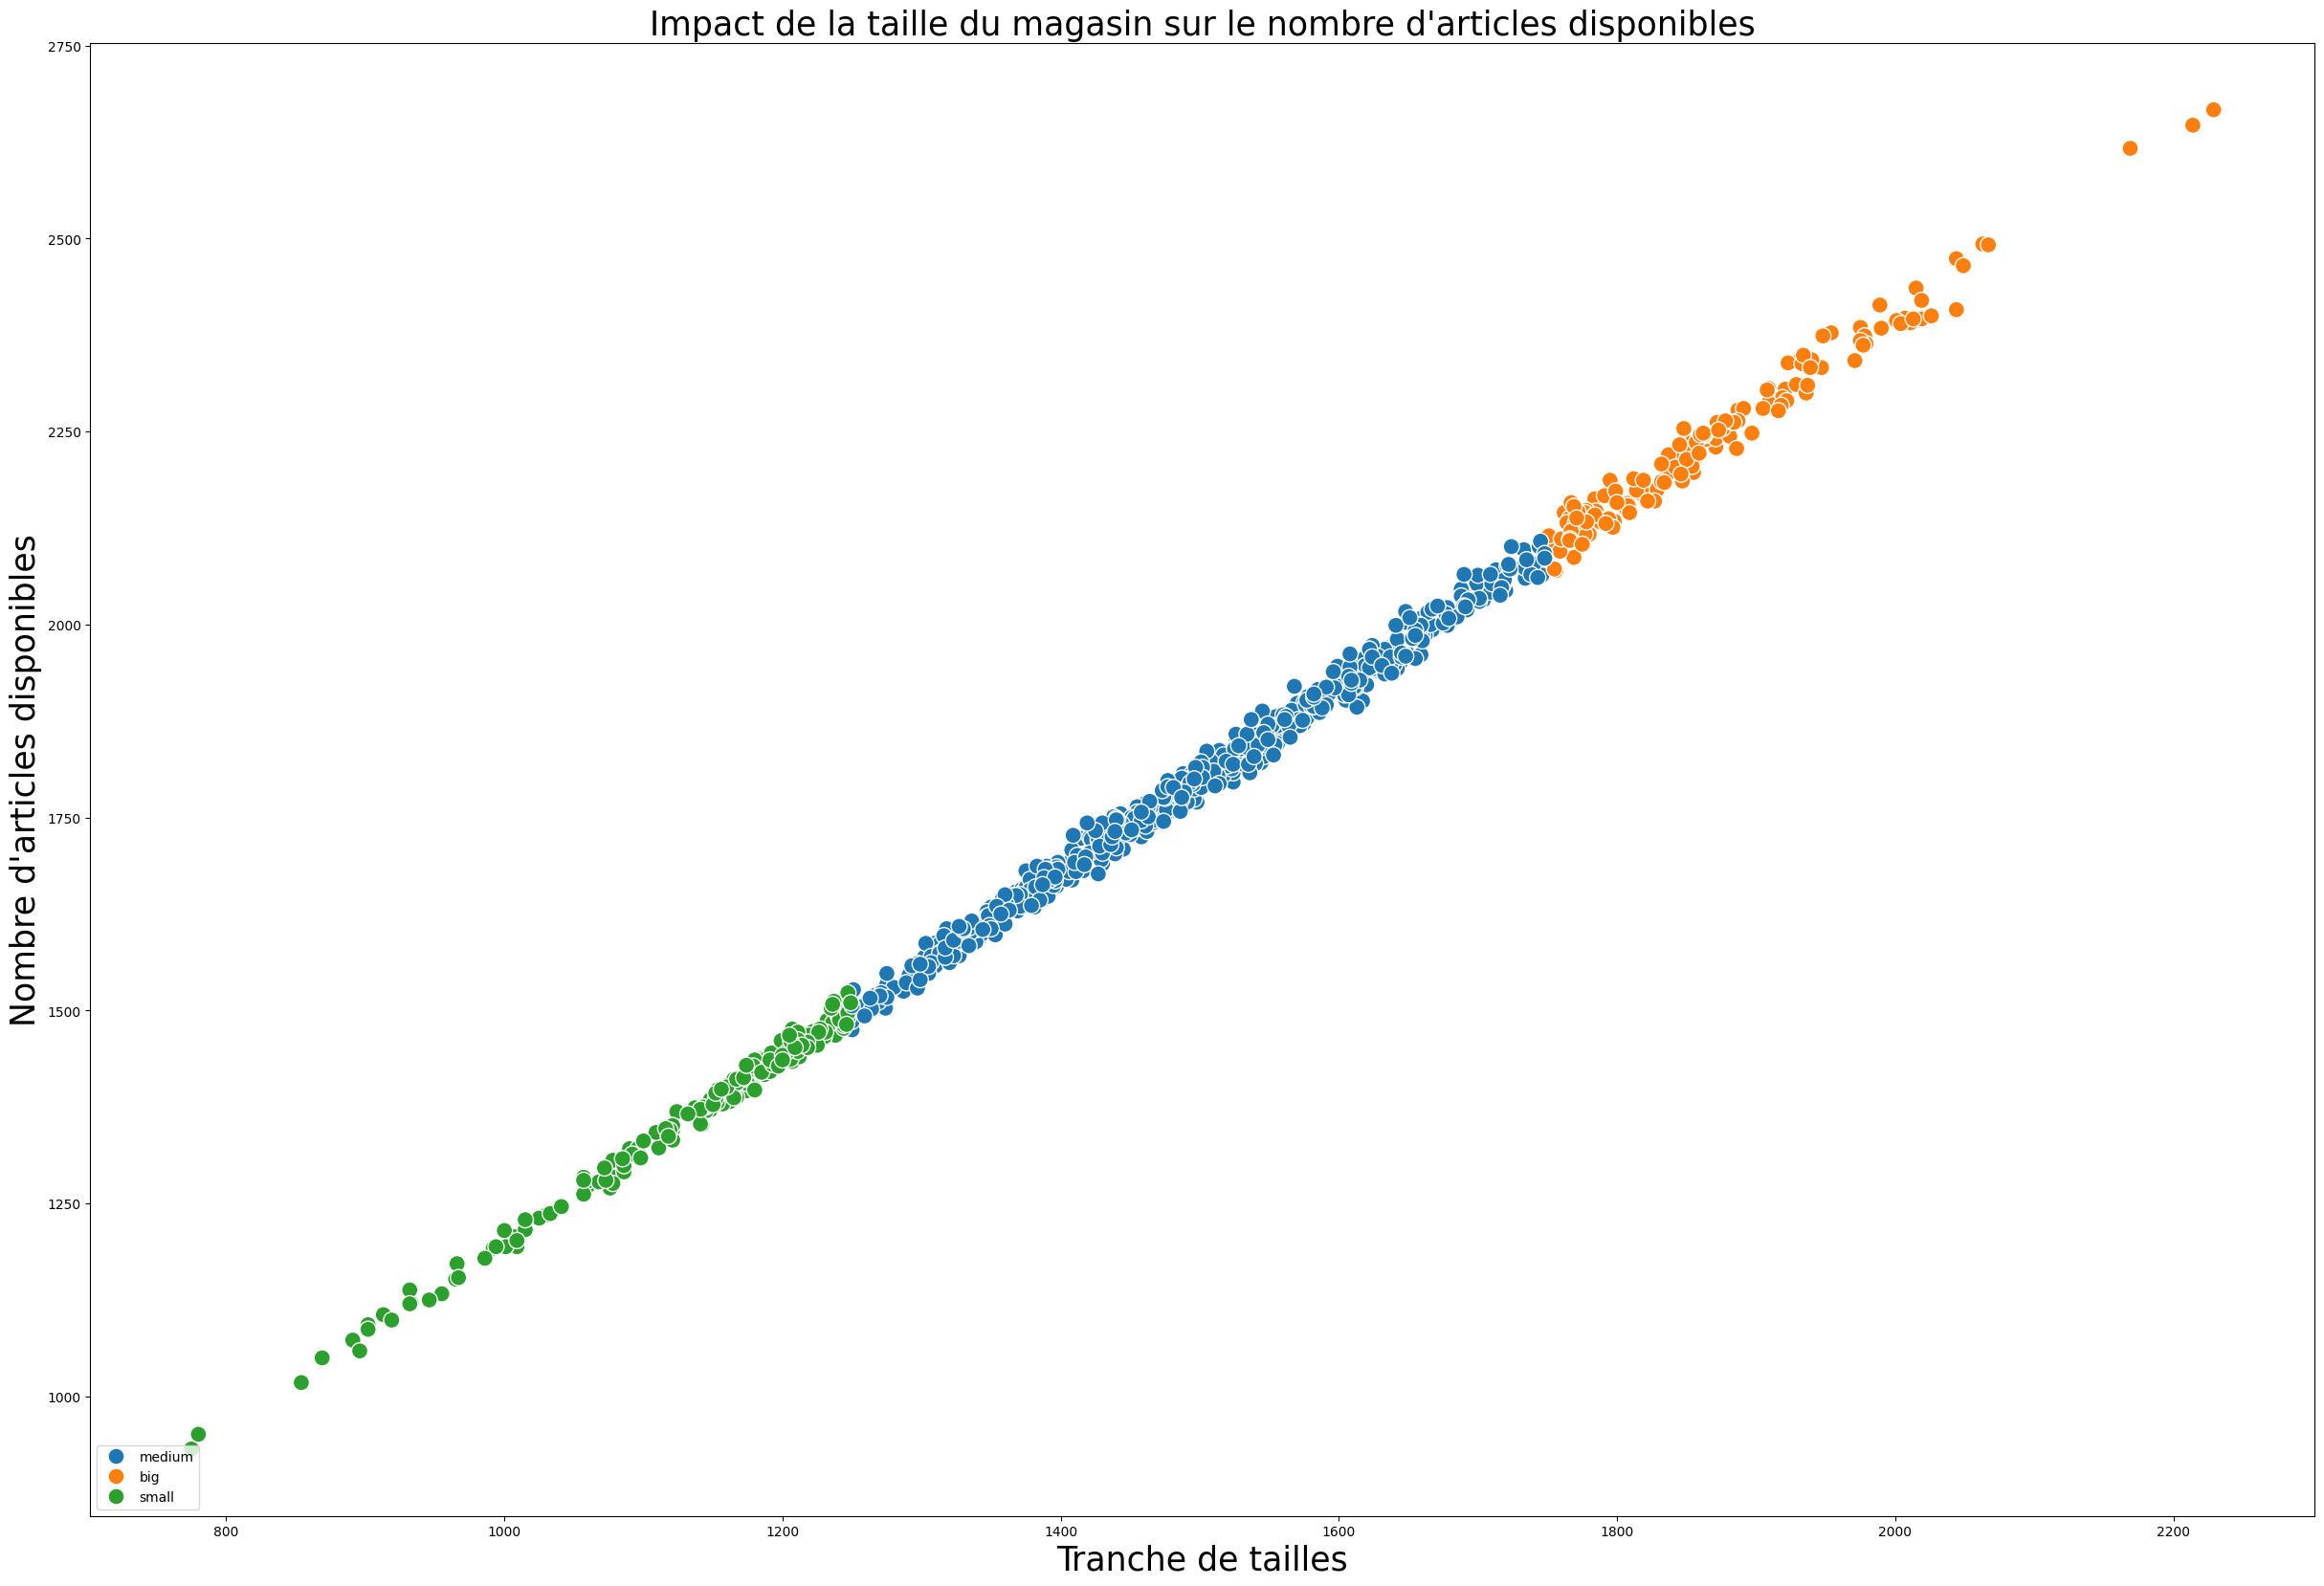

In [41]:
#Show result by class size

plt.figure(figsize = (30,20))

sns.scatterplot(data=data,x='Store_size', y= "Items_Available", hue="class_size", s=150)

plt.legend(loc='lower left',markerscale=1)

plt.xlabel('Tranche de tailles',size=25)
plt.ylabel('Nombre d\'articles disponibles', size=25)
plt.title('Impact de la taille du magasin sur le nombre d\'articles disponibles', size=25)
plt.show()

### Compare store size (range) with the Store Sales

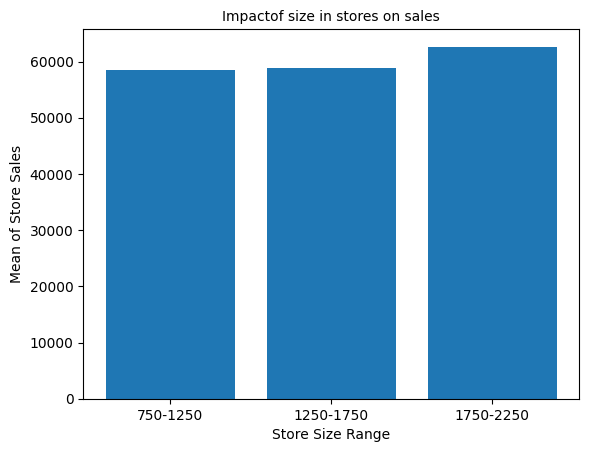

In [32]:
Store_Sales=newData['Store_Sales'].mean()

#plotting the results

plt.title('Impactof size in stores on sales',fontsize = 10)
plt.bar(height = Store_Sales, x =sizeData.index) # Use values for percentages
plt.xlabel('Store Size Range')
plt.ylabel('Mean of Store Sales')
plt.show()

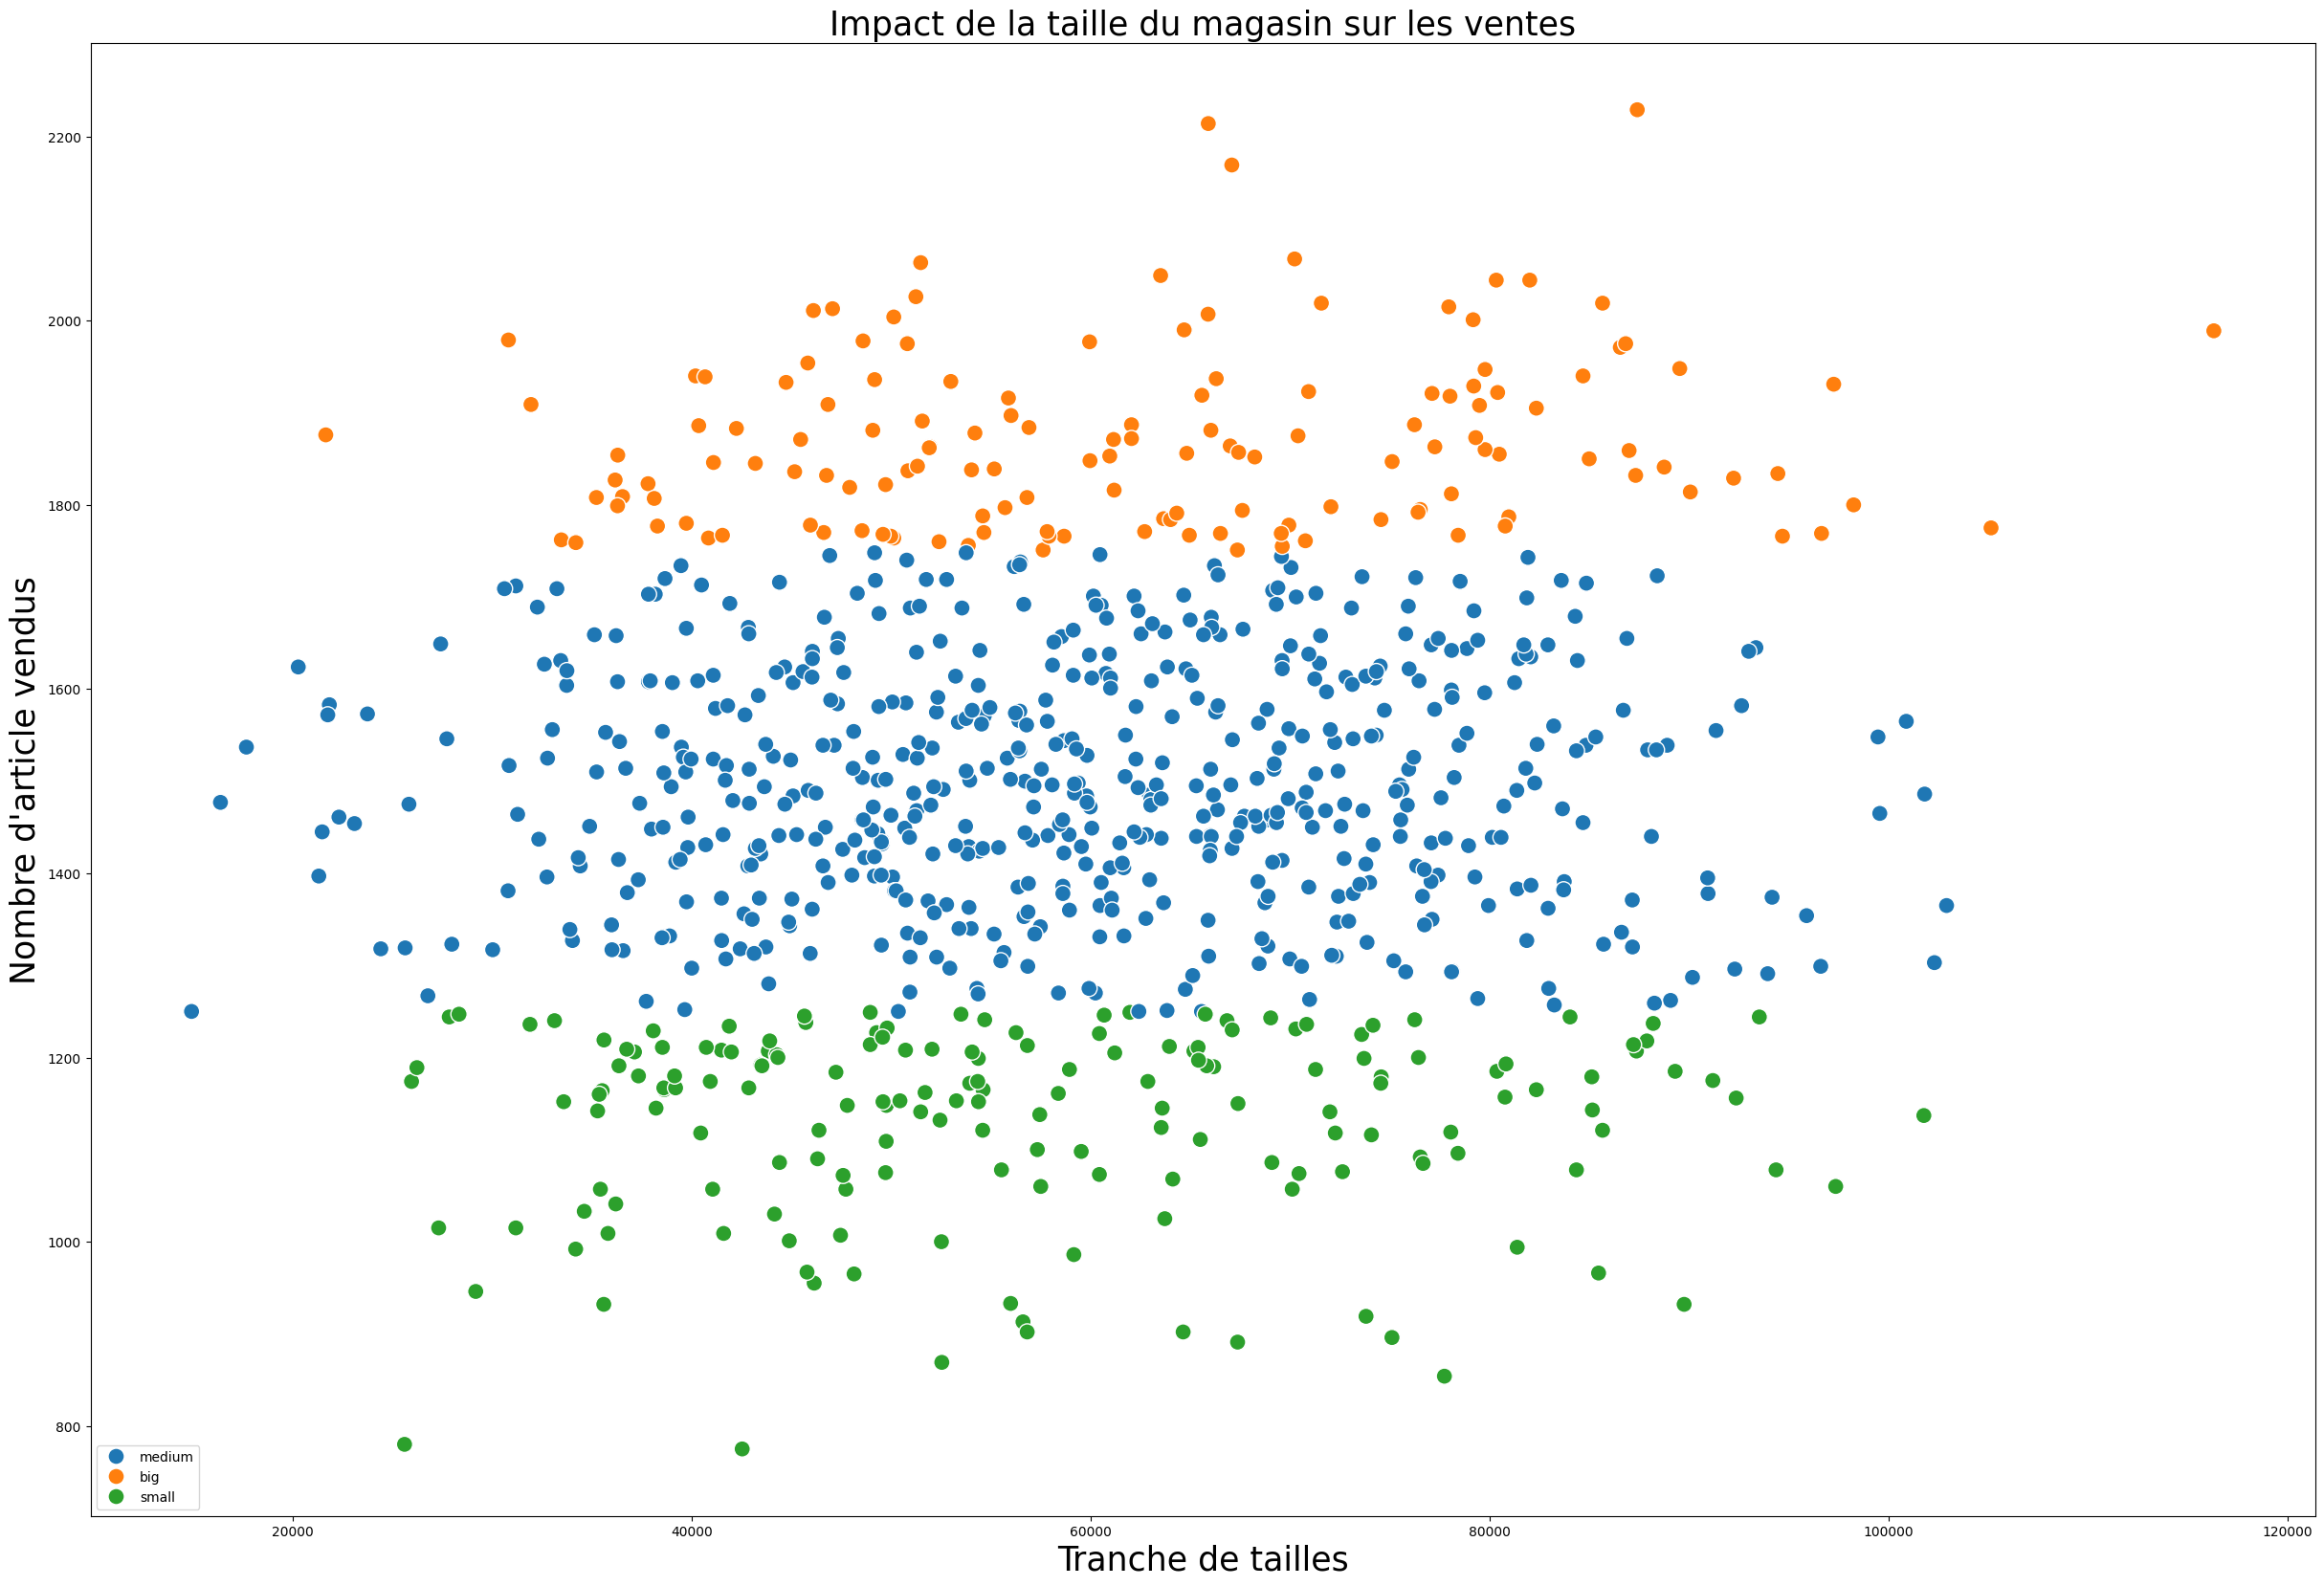

In [39]:
#Show result by class size

plt.figure(figsize = (30,20))

sns.scatterplot(data=data,x='Store_Sales', y= "Store_size", hue="class_size", s=150)

plt.legend(loc='lower left',markerscale=1)

plt.xlabel('Tranche de tailles',size=25)
plt.ylabel('Nombre d\'article vendus', size=25)
plt.title('Impact de la taille du magasin sur les ventes', size=25)
plt.show()